In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize $M^*$ eigenvalues and eigenvectors

The eigenvalues are expected to quickly tend to zero, meaning that the top eigenvectors corresponding to the largest eigenvalues represent directions that are most important to the prediction, while the other directions bear little relevance. This can help in feature selection. 
</br>

If we can visualize the most important directions, we might be able to get a meaningful interpretation; for example, a path where a fish moves or something.

# Plot eigenvalues

In [202]:
num_eig = 10 # number of eigenvalues in the plot
num_M = 100 # number of matrices to analyze
train_sz = 150 # graph size on which M is trained

# choose your feature
# feature_id = '3dsift'
# res_path = '../../data/experiments/sift3d/sift3d_sg/2023_07_14/' # path from where M's are loaded

# feature_id = 'slowfast'
# res_path = '../../data/experiments/slowfast/slowfast_sg/2023_05_04-runtime-n/'

feature_id = 'soenet'
res_path = '../../data/experiments/soenet/soenet_sg/2023_07_17/'

In [203]:
eigvals = []
for i in range(num_M):
    M = np.load(res_path+'matrices/finalM_50_'+str(train_sz)+'_'+str(i)+'.npy')
    w = np.sort(np.linalg.eigvals(M))
    eigvals.append(w)
    
eigvals = np.array(eigvals)
print('{} eigenvalues are computed in {} matrices and stored in an array of shape '.format(eigvals.shape[1], eigvals.shape[0]), eigvals.shape)

400 eigenvalues are computed in 100 matrices and stored in an array of shape  (100, 400)


In [204]:
# plot average and errors of eigenvalues
eigvals_avg = np.mean(eigvals, axis=0)
eigvals_err = np.std(eigvals, axis=0)

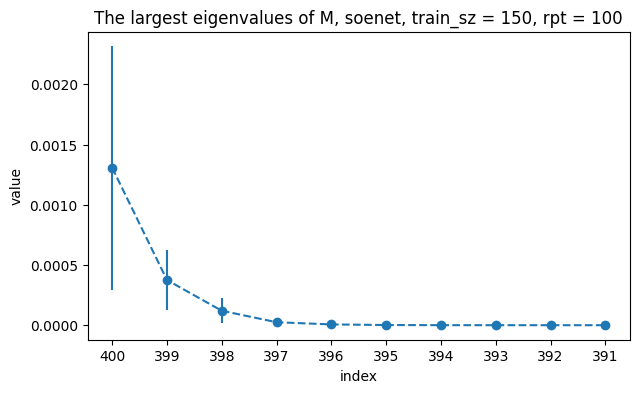

In [205]:
x = eigvals.shape[1] - np.arange(num_eig)
plt.figure(figsize=(7,4))
plt.errorbar(np.arange(num_eig), np.real(eigvals_avg[-1:-num_eig-1:-1]), np.real(eigvals_err[-1:-num_eig-1:-1]), marker='o', linestyle='--')
_ = plt.xticks(np.arange(num_eig), x)
plt.xlabel('index')
plt.ylabel('value')
plt.title('The largest eigenvalues of M, {}, train_sz = {}, rpt = {}'.format(feature_id, train_sz, num_M))
plt.savefig('image/eigvals.png',dpi=300, bbox_inches = "tight")

# Compute eigengaps

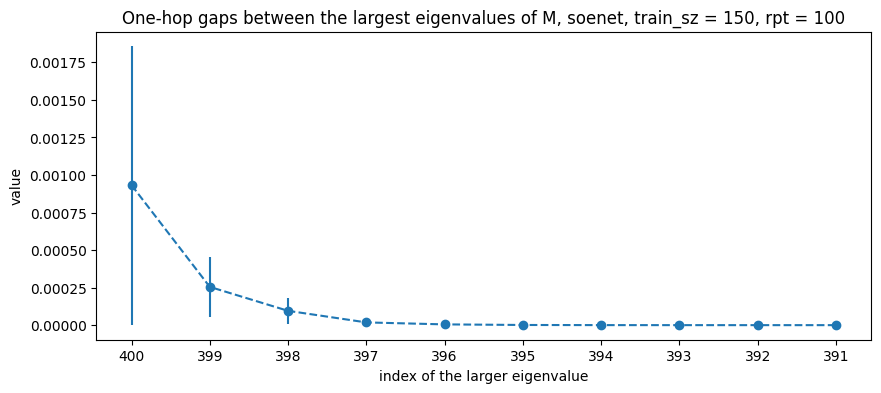

In [206]:
eiggaps = eigvals[:, 1:] - eigvals[:, :-1]

# plot eigengaps among the largest eigenvalues (!= the largest eigengaps)
eiggaps_avg = np.mean(eiggaps, axis=0)
eiggaps_err = np.std(eiggaps, axis=0)

plt.figure(figsize=(10,4))
plt.errorbar(np.arange(num_eig), np.real(eiggaps_avg[-1:-num_eig-1:-1]), np.real(eiggaps_err[-1:-num_eig-1:-1]), marker='o', linestyle='--')
_ = plt.xticks(np.arange(num_eig), x)
plt.xlabel('index of the larger eigenvalue')
plt.ylabel('value')
plt.title('One-hop gaps between the largest eigenvalues of M, {}, train_sz = {}, rpt = {}'.format(feature_id, train_sz, num_M))
plt.savefig('image/eiggaps.png',dpi=300, bbox_inches = "tight")

# Plot eigenvalues by trainig size

In [207]:
train_sizes = [100, 200, 250, 300, 400, 500, 600]

In [208]:
eigvals2 = []
for train_sz in train_sizes:
    for i in range(num_M):
        M = np.load(res_path+'matrices/finalM_50_'+str(train_sz)+'_'+str(i)+'.npy')
        w = np.sort(np.linalg.eigvals(M))
        eigvals2.append(w)
    
eigvals2 = np.array(eigvals2)
print('{} eigenvalues are computed in {}x{} matrices and stored in an array of shape '.format(eigvals2.shape[1], len(train_sizes), num_M), eigvals2.shape)

400 eigenvalues are computed in 7x100 matrices and stored in an array of shape  (700, 400)


In [209]:
# plot average and errors of eigenvalues
curves = []
errors = []
for t in range(len(train_sizes)):
    eigvals_avg2 = np.mean(eigvals2[t*num_M:t*num_M+num_M, :], axis=0)
    eigvals_err2 = np.std(eigvals2[t*num_M:t*num_M+num_M, :], axis=0)
    curves.append(eigvals_avg2)
    errors.append(eigvals_err2)

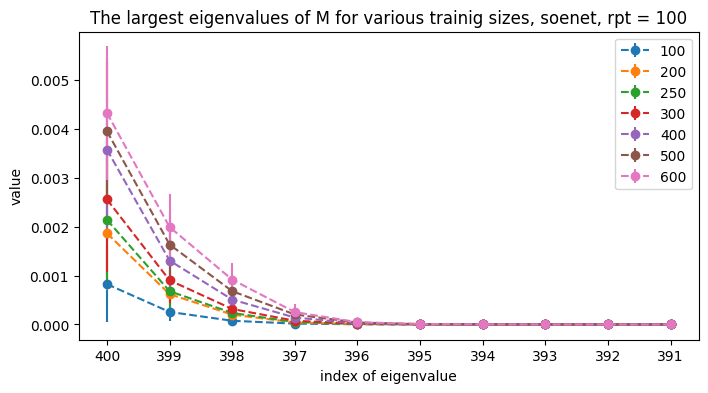

In [210]:
plt.figure(figsize=(8,4))
for t in range(len(train_sizes)):
    plt.errorbar(np.arange(num_eig), np.real(curves[t][-1:-num_eig-1:-1]), np.real(errors[t][-1:-num_eig-1:-1]), marker='o', linestyle='--')
_ = plt.xticks(np.arange(num_eig), x)
plt.legend(train_sizes)
plt.xlabel('index of eigenvalue')
plt.ylabel('value')
plt.title('The largest eigenvalues of M for various trainig sizes, {}, rpt = {}'.format(feature_id, num_M))
plt.savefig('image/eigvals4trainsz.png',dpi=300, bbox_inches = "tight")

# Plot eigengaps by training size

In [211]:
eiggaps2 = eigvals2[:, 1:] - eigvals2[:, :-1]

curves_gap = []
errors_gap = []
for t in range(len(train_sizes)):
    eiggaps_avg2 = np.mean(eiggaps2[t*num_M:t*num_M+num_M, :], axis=0)
    eiggaps_err2 = np.std(eiggaps2[t*num_M:t*num_M+num_M, :], axis=0)
    curves_gap.append(eiggaps_avg2)
    errors_gap.append(eiggaps_err2)

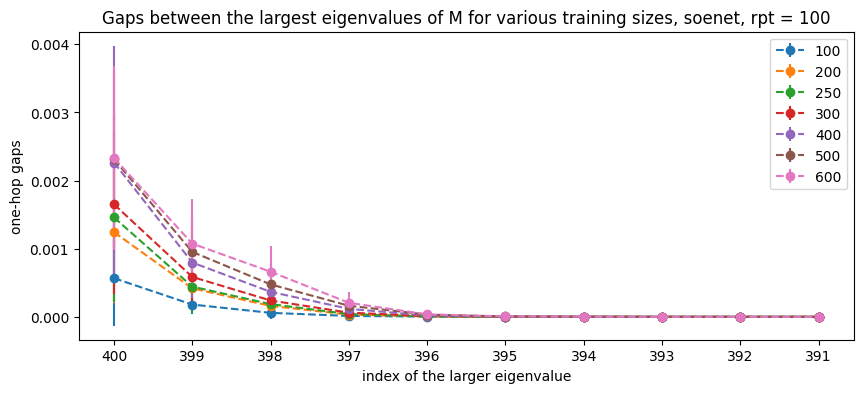

In [212]:
plt.figure(figsize=(10,4))
for t in range(len(train_sizes)):
    plt.errorbar(np.arange(num_eig), np.real(curves_gap[t][-1:-num_eig-1:-1]), np.real(errors_gap[t][-1:-num_eig-1:-1]), marker='o', linestyle='--')
_ = plt.xticks(np.arange(num_eig), x)
plt.legend(train_sizes)
plt.xlabel('index of the larger eigenvalue')
plt.ylabel('one-hop gaps')
plt.title('Gaps between the largest eigenvalues of M for various training sizes, {}, rpt = {}'.format(feature_id, num_M))
plt.savefig('image/eiggaps4trainsz.png',dpi=300, bbox_inches = "tight")

# Plot eigenvalues by feature set

In [267]:
train_sz = 150

# feature_paths = {'3dsift': '../../data/experiments/sift3d/sift3d_sg/2023_07_14/',
#            'slowfast': '../../data/experiments/slowfast/slowfast_sg/2023_05_04-runtime-n/',
#            'soenet': '../../data/experiments/soenet/soenet_sg/2023_07_17/'}

feature_paths = {'slowfast': '../../data/experiments/slowfast/slowfast_sg/2023_05_04-runtime-n/',
           'soenet': '../../data/experiments/soenet/soenet_sg/2023_07_17/'}

In [268]:
eigvals3 = []
for feature_id in feature_paths:
    for i in range(num_M):
        M = np.load(feature_paths[feature_id]+'matrices/finalM_50_'+str(train_sz)+'_'+str(i)+'.npy')
        w = np.sort(np.linalg.eigvals(M))
        eigvals3.append(w)

eigvals4 = []
for f in range(len(feature_paths)):
    eigvals4.append(np.array(eigvals3[f*num_M:f*num_M+num_M]))
    print('feature #{}: {} eigenvalues are computed in {} matrices and stored in an array of shape '.format(f, eigvals4[f].shape[1], num_M), eigvals4[f].shape)

feature #0: 474 eigenvalues are computed in 100 matrices and stored in an array of shape  (100, 474)
feature #1: 400 eigenvalues are computed in 100 matrices and stored in an array of shape  (100, 400)


In [269]:
# plot average and errors of eigenvalues
curves4 = []
errors4 = []
for f in range(len(feature_paths)):
    eigvals_avg4 = np.mean(eigvals4[f], axis=0)
    eigvals_err4 = np.std(eigvals4[f], axis=0)
    curves4.append(eigvals_avg4)
    errors4.append(eigvals_err4)

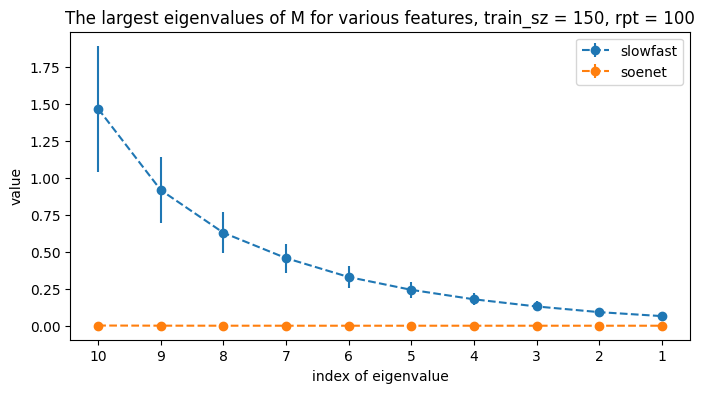

In [270]:
plt.figure(figsize=(8,4))
for f in range(len(feature_paths)):
    plt.errorbar(np.arange(num_eig), np.real(curves4[f][-1:-num_eig-1:-1]), np.real(errors4[f][-1:-num_eig-1:-1]), marker='o', linestyle='--')
_ = plt.xticks(np.arange(num_eig), 10-np.arange(num_eig))
plt.legend(feature_paths.keys())
plt.xlabel('index of eigenvalue')
plt.ylabel('value')
plt.title('The largest eigenvalues of M for various features, train_sz = {}, rpt = {}'.format(train_sz, num_M))
plt.savefig('image/eigvals4features.png',dpi=300, bbox_inches = "tight")

# Plot eigengaps by feature sets

In [271]:
eiggaps4 = []

for f in range(len(feature_paths)):
    eiggaps4.append(eigvals4[f][:, 1:] - eigvals4[f][:, :-1])

In [272]:
# plot eigengaps
curves_gap4 = []
errors_gap4 = []
for f in range(len(feature_paths)):
    eiggaps_avg4 = np.mean(eiggaps4[f], axis=0)
    eiggaps_err4 = np.std(eiggaps4[f], axis=0)
    curves_gap4.append(eiggaps_avg4)
    errors_gap4.append(eiggaps_err4)

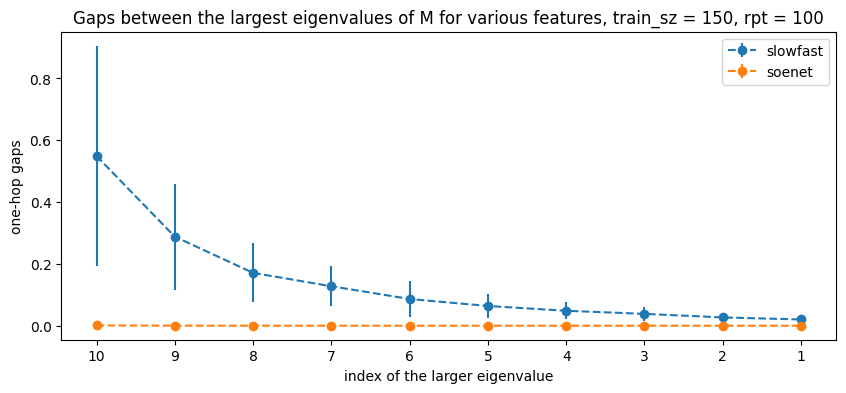

In [273]:
plt.figure(figsize=(10,4))
for f in range(len(feature_paths)):
    plt.errorbar(np.arange(num_eig), np.real(curves_gap4[f][-1:-num_eig-1:-1]), np.real(errors_gap4[f][-1:-num_eig-1:-1]), marker='o', linestyle='--')
_ = plt.xticks(np.arange(num_eig), 10-np.arange(num_eig))
plt.legend(feature_paths.keys())
plt.xlabel('index of the larger eigenvalue')
plt.ylabel('one-hop gaps')
plt.title('Gaps between the largest eigenvalues of M for various features, train_sz = {}, rpt = {}'.format(train_sz, num_M))
plt.savefig('image/eiggaps4features.png',dpi=300, bbox_inches = "tight")

# Plot eigenvectors

In [32]:
num_M = 10 # number of matrices to analyze
train_sz = 150 # graph size on which M is trained

# choose your feature
# feature_id = '3dsift'
# res_path = '../../data/experiments/sift3d/sift3d_sg/2023_07_14/' # path from where M's are loaded

# feature_id = 'slowfast'
# res_path = '../../data/experiments/slowfast/slowfast_sg/2023_05_04-runtime-n/'

feature_id = 'soenet'
res_path = '../../data/experiments/soenet/soenet_sg/2023_07_17/'

In [33]:
maxeig_vecs = []
for i in range(num_M):
    M = np.load(res_path+'matrices/finalM_50_'+str(train_sz)+'_'+str(i)+'.npy')
    eigvals, eigvecs = np.linalg.eig(M)
    sorted_eigvals = sorted(list(zip(np.arange(eigvals.shape[0]), np.real(eigvals))), key = lambda x: x[1])
    maxeig_ind = sorted_eigvals[-1][0]
    maxeig_vec = eigvecs[: ,maxeig_ind]
    maxeig_vecs.append(maxeig_vec)
    
maxeig_vecs = np.array(maxeig_vecs)

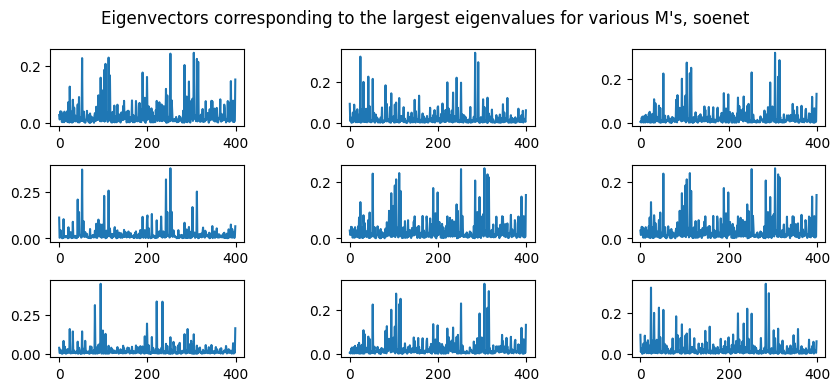

In [35]:
# plot several max eigenvectors
xs = np.arange(len(maxeig_vecs[0]))
plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for j in range(9):
    ind = np.random.randint(0, num_M)
    plt.subplot(3,3,j+1)
    plt.plot(xs, np.abs(np.real(maxeig_vecs[ind])))

_ = plt.suptitle('Eigenvectors corresponding to the largest eigenvalues for various M\'s, {}'.format(feature_id))
plt.savefig('image/eigvecs.png',dpi=300, bbox_inches = "tight")

# Percentiles of eigenvectors

In [5]:
def get_percentiles(maxeig_vects):
    minele = np.min(maxeig_vects, axis=1)
    quan25 = np.quantile(maxeig_vects, q=0.25, axis=1)
    quan50 = np.quantile(maxeig_vects, q=0.50, axis=1)
    quan75 = np.quantile(maxeig_vects, q=0.75, axis=1)
    quan90 = np.quantile(maxeig_vects, q=0.90, axis=1)
    maxele = np.max(maxeig_vects, axis=1)
    
    percentiles = np.transpose(np.array([minele, quan25, quan50, quan75, quan90, maxele]))

    return percentiles

In [6]:
percentiles = get_percentiles(np.abs(np.real(maxeig_vecs)))

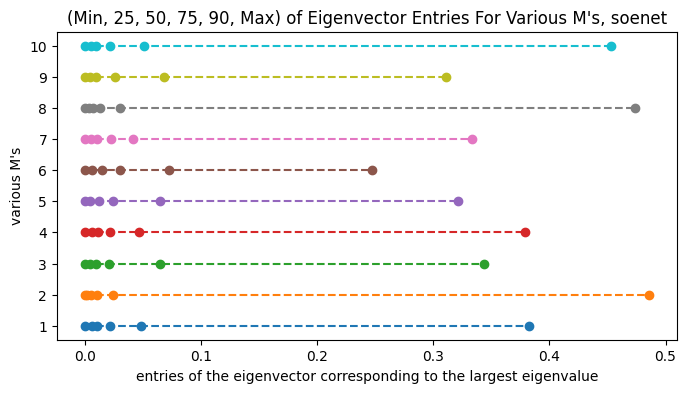

In [7]:
ys = np.ones(percentiles.shape[1])

plt.figure(figsize=(8,4))
for i in range(num_M):
    plt.plot(percentiles[i], ys*(i+1), marker='o', linestyle='--')

_ = plt.yticks(np.arange(num_M)+1)
plt.ylabel('various M\'s')
plt.xlabel('entries of the eigenvector corresponding to the largest eigenvalue')
_=plt.title('(Min, 25, 50, 75, 90, Max) of Eigenvector Entries For Various M\'s, {}'.format(feature_id))
plt.savefig('image/eigvec_percentiles.png',dpi=300, bbox_inches = "tight")

# Are all eigenvectors reducing the original space to the same space?

In [8]:
maxeig_vecs.shape

(10, 400)

In [17]:
scores_mean = np.mean(np.abs(maxeig_vecs), axis=0)
scores_std = np.std(np.abs(maxeig_vecs), axis=0)

<ErrorbarContainer object of 3 artists>

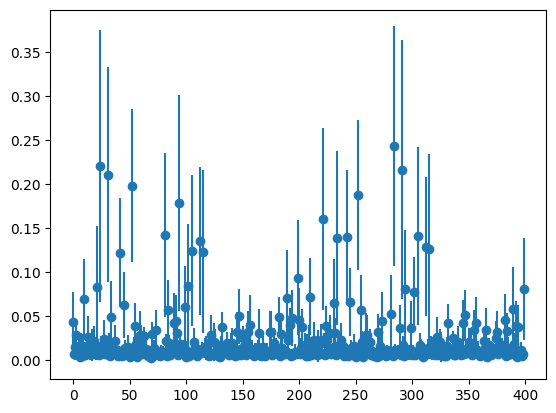

In [21]:
plt.figure()
plt.errorbar(np.arange(maxeig_vecs.shape[1]), scores_mean, scores_std, linestyle='', marker='o')

# Compute average percentiles of eigenvector entries

In [26]:
num_M = 100 # do not draw plots with this high number, only compute averages
train_sz = 200

maxeig_vecs = []
for i in range(num_M):
    M = np.load(res_path+'matrices/finalM_50_'+str(train_sz)+'_'+str(i)+'.npy')
    eigvals, eigvecs = np.linalg.eig(M)
    sorted_eigvals = sorted(list(zip(np.arange(eigvals.shape[0]), np.real(eigvals))), key = lambda x: x[1])
    maxeig_ind = sorted_eigvals[-1][0]
    maxeig_vec = eigvecs[: ,maxeig_ind]
    maxeig_vecs.append(maxeig_vec)
    
maxeig_vecs = np.array(maxeig_vecs)

In [23]:
percentiles = get_percentiles(np.abs(np.real(maxeig_vecs)))
avg_percentiles = np.mean(percentiles, axis=0)
std_percentiles = np.std(percentiles, axis=0)
print('average percentiles: ', avg_percentiles)
print('errors: ', std_percentiles)

average percentiles:  [8.95901035e-05 6.51299343e-03 1.16584382e-02 2.29409007e-02
 5.33093812e-02 3.63094989e-01]
errors:  [0.00011922 0.00478299 0.00531323 0.0059603  0.01393599 0.07091048]


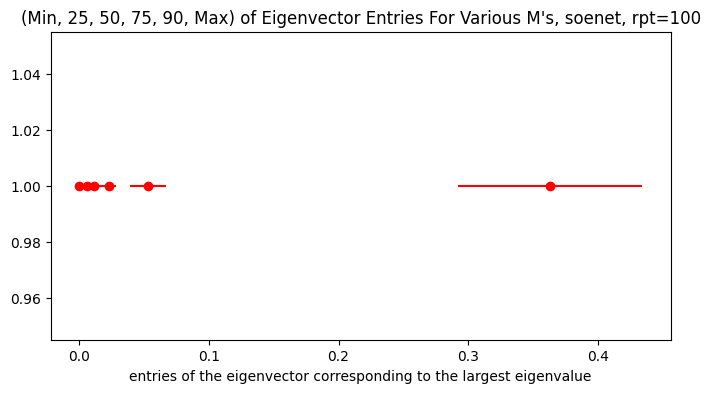

In [24]:
plt.figure(figsize=(8,4))
plt.errorbar(avg_percentiles, np.ones(len(avg_percentiles)), yerr=None, xerr=std_percentiles, marker='o', linestyle='', color='red')
plt.xlabel('entries of the eigenvector corresponding to the largest eigenvalue')
_=plt.title('(Min, 25, 50, 75, 90, Max) of Eigenvector Entries For Various M\'s, {}, rpt={}'.format(feature_id, num_M))
plt.savefig('image/avg_percentiles.png',dpi=300, bbox_inches = "tight")

# Compute average values of each feature in eigenvectors

Text(0.5, 1.0, 'Median')

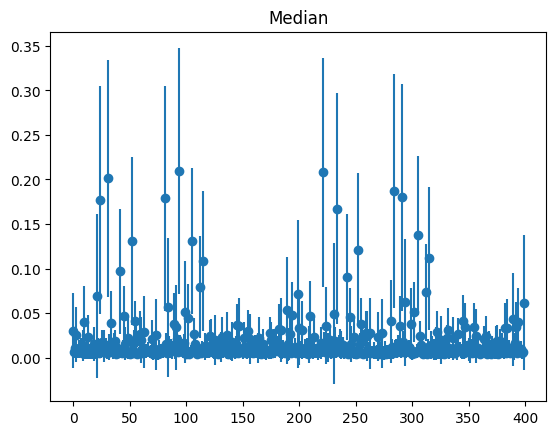

In [30]:
scores_mean = np.mean(np.abs(maxeig_vecs), axis=0)
scores_med = np.median(np.abs(maxeig_vecs), axis=0)
scores_std = np.std(np.abs(maxeig_vecs), axis=0)

plt.figure()
plt.errorbar(np.arange(maxeig_vecs.shape[1]), scores_med, scores_std, linestyle='', marker='o')
plt.title('Median')

# Computer the correlation coefficient of various observations of an eigenvector

In [39]:
corrs = np.corrcoef(np.abs(maxeig_vecs))

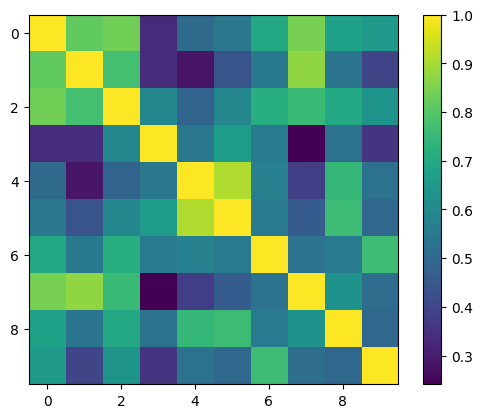

In [42]:
plt.imshow(corrs)
plt.colorbar()

# Average percentiles for various training sizes

In [107]:
train_sizes = [100, 200, 250, 300, 400, 500, 600]

In [108]:
num_M = 100

maxeig_vecs = []
for train_sz in train_sizes:
    for i in range(num_M):
        M = np.load(res_path+'matrices/finalM_50_'+str(train_sz)+'_'+str(i)+'.npy')
        eigvals, eigvecs = np.linalg.eig(M)
        sorted_eigvals = sorted(list(zip(np.arange(eigvals.shape[0]), np.real(eigvals))), key = lambda x: x[1])
        maxeig_ind = sorted_eigvals[-1][0]
        maxeig_vec = eigvecs[: ,maxeig_ind]
        maxeig_vecs.append(maxeig_vec)

maxeig_vecs = np.array(maxeig_vecs)
print(maxeig_vecs.shape)

(700, 400)


In [109]:
percentiles = get_percentiles(np.abs(np.real(maxeig_vecs)))

In [110]:
avg_percentiles = []
std_percentiles = []
for t in range(len(train_sizes)):
    avg_percentiles.append(np.mean(percentiles[t*num_M:t*num_M+num_M, :], axis=0))
    std_percentiles.append(np.std(percentiles[t*num_M:t*num_M+num_M, :], axis=0))

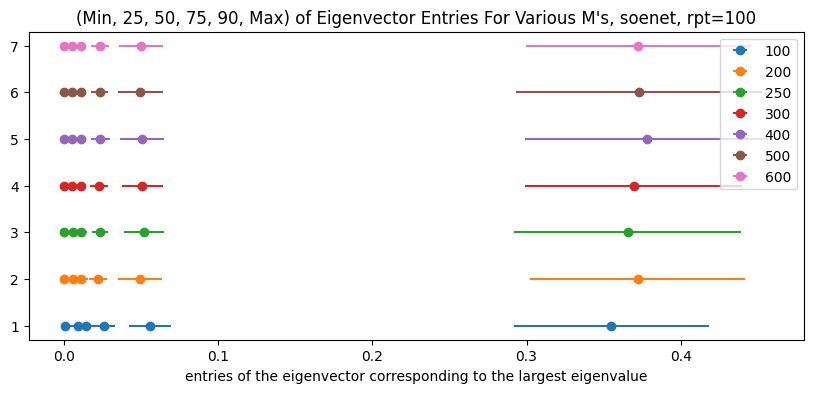

In [111]:
plt.figure(figsize=(10,4))
for t in range(len(train_sizes)):
    plt.errorbar(avg_percentiles[t], np.ones(len(avg_percentiles[t]))*(t+1), yerr=None, xerr=std_percentiles[t], marker='o', linestyle='')
plt.legend(train_sizes)
plt.xlabel('entries of the eigenvector corresponding to the largest eigenvalue')
_=plt.title('(Min, 25, 50, 75, 90, Max) of Eigenvector Entries For Various M\'s, {}, rpt={}'.format(feature_id, num_M))
plt.savefig('image/avg_percentiles4trainsz.png',dpi=300, bbox_inches = "tight")

# Compare sparseness of eigenvectors with M entries